## 0 - Importando as bibliotecas e configurando o Plotly
Inicialmente, precisamos instalar e importar as bibliotecas que serão utilizadas. Também é necessário deixar o plotly no modo offline.

In [2]:
# Instalando as bibliotecas
%pip install plotly
%pip install cufflinks
%pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=537c5419aa7c9134158993caae6c492731609c947211080fb54677182cd56e46
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

## 1 - Line plots
Esse tipo de gráfico é muito comum, principalmente na análise de séries temporais. Nesse exemplo, estão sendo explorados os dados dos preços de gasolina no Brasil entre 2004 e 2019, fornecidos pela ANP.

In [5]:
# Lendo os dados
gas_df = pd.read_csv('2004-2021.tsv', sep='\t', index_col=0, parse_dates=['DATA INICIAL', 'DATA FINAL']).reset_index()
gas_df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [6]:
# Selecionando apenas a gasolina em São Paulo
df_precos = gas_df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')

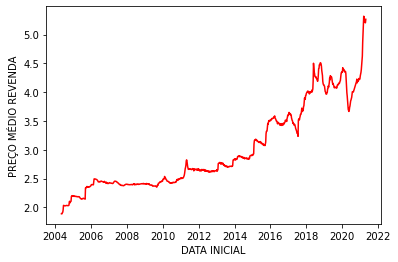

In [7]:
# Plotando os dados com lineplot do seaborn
sns.lineplot(data=df_precos, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

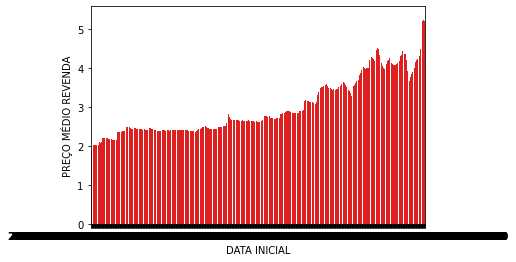

In [13]:
# Plotando os dados com barplot do seaborn
sns.barplot(data=df_precos, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

In [12]:
# Plotando os dados de forma identica com o Plotly
px.line(df_precos, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA')

Com o Plotly, notamos que o gráfico é mais interativo que o do seaborn, mesmo quando escrevemos uma quantidade menor de código. Mas também devemos levar em conta que o Plotly é muito mais pesado que o seaborn, isso é ainda mais evidente quando geramos muitos gráficos em um notebook, ou temos que gerar gráficos que usam muitos dados.

In [ ]:
# Criando um gŕafico personalizado
px.line(
    gas_df.query('ESTADO == "SAO PAULO" and PRODUTO != "GLP"'),
    x='DATA INICIAL',
    y='PREÇO MÉDIO REVENDA',
    color='PRODUTO',
    labels={'DATA INICIAL':'Data', 'PREÇO MÉDIO REVENDA':'Preço médio de revenda'},
    title='Preços médios de revenda para vários combustíveis entre 2004 e 2021'
)

In [ ]:
# Usando o graph_objects, podemos personalizar mais ainda

fig = go.Figure() # Inicializando uma figura

fig.add_trace(go.Scatter(
    x=gas_df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=gas_df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='São Paulo',
    line=dict(color='red', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=gas_df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=gas_df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='Rio de Janeiro',
    line=dict(color='green', width=2, dash='dashdot')
))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    yaxis=dict(
        showline=True,
        showticklabels=True,
        gridcolor='rgb(200, 200, 200)',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    plot_bgcolor='white',
    title='Preço da gasolina em SP e RJ'
)

fig

## 2 - Scatter plots
Esse tipo de gráfico é útil para observar tendências e identificar agrupamentos nos dados.

In [ ]:
# Carregando o dataset iris, contém dados de diferentes espécies de flores
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Criando um scatter plot simples
px.scatter(iris, x='sepal_length', y='sepal_width', color='species', symbol='species',
          hover_name='species', title='Scatter plot do comprimento x largura da sépala')

In [ ]:
# Criando o mesmo scatter plot para os dados da pétala
px.scatter(iris, x='petal_length', y='petal_width', color='species', symbol='species',
          hover_name='species', title='Scatter plot do comprimento x largura da pétala')

Com o plotly, também é possível fazer uma grande variedade de plots 3D interativos, nesse exemplo, é possível fazer um scatter plot 3D para visualizar os clusters.

In [ ]:
#Plot 3D
px.scatter_3d(iris, x='petal_length', z='petal_width', y='sepal_width',
              color='species', symbol='species', color_discrete_sequence=px.colors.qualitative.Set1,
              hover_data=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'],
              hover_name='species',
              title='Scatter plot 3D do Dataset Iris')

## 3 - Gráficos para representar distribuições
Existem vários tipos de gráficos que podem ser utilizados para representar como os diferentes dados estão distribuídos no seu dataset. O Plotly possui diversos gráficos desse tipo. 

In [ ]:
# Histograma
px.histogram(iris, x='petal_length', color='species', nbins=30,
             title='Distribuição dos comprimentos de pétala por espécie')

In [ ]:
# Box plot
px.box(iris, x='species', y='petal_length', title='Distribuição dos comprimentos de pétala por espécie')

In [ ]:
# Violin plot
px.violin(iris, x='species', y='petal_length', box=True, points='all',
          title='Distribuição dos comprimentos de pétala por espécie')

## 4 - Gráfico de pizza
Esse tipo de gráfico é muito conhecido, e pode ser útil para representar porcentagens de maneira visual.

In [ ]:
netflix = pd.read_excel('netflix_titles.xlsx')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
px.pie(netflix, names='type', title='Porcentagem de cada tipo de conteúdo na Netflix',
       color_discrete_sequence=['#E50914', '#831010'])

In [ ]:
px.pie(netflix.query('country=="Brazil"'), names='rating', color_discrete_sequence=px.colors.qualitative.Prism,
      title='Porcentagem de conteúdo brasileiro para cada classificação indicativa', hole=0.5)

## 5 - Gráficos geográficos

Com o Plotly, podemos gerar vários gráficos utilizando mapas. Um dos mais interessantes são os Scatter plots com mapa, no qual podemos usar um globo 3D para representar os dados.

In [ ]:
gapminder_df = px.data.gapminder()
gapminder_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
# Mapa 2D
fig = px.scatter_geo(
    gapminder_df.query('year == 2007'),
    locations='iso_alpha',
    color='continent',
    hover_name='country',
    size='pop',
    title='População mundial em 2007',
    projection='natural earth', #Esse parâmetro define o tipo de mapa
)

# Observe que podemos salvar a figura para mostra-la depois
fig

In [ ]:
# Globo 3D
fig = px.scatter_geo(
    gapminder_df.query('year == 2007'),
    locations='iso_alpha',
    color='continent',
    hover_name='country',
    size='pop',
    title='População mundial em 2007',
    projection='orthographic' #Esse parâmetro define o tipo de mapa
)

# Essa é outra forma de mostrar a figura
fig.show()

## 6 - Animações
Utilizando os mesmos gráficos mostrados anteriormente, também podemos criar animações com facilidade. Para isso, devemos passar um conjunto de dados que será responsável pelos frames da animação, uma escolha comum para isso são dados relacionados à data.

In [ ]:
px.scatter_geo(
    gapminder_df,
    locations='iso_alpha',
    color='continent',
    hover_name='country',
    size='pop',
    title='População mundial em 1952 e 2007',
    projection='natural earth',
    animation_frame='year' # Cada valor dessa coluna gerará um frame da animação
)